In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import networkx as nx

import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

## For the daily 'abortion' bidimensional laplacian eigenmaps

In [2]:
# get dates mapping
pickle_folder_path = "../pickle/abortion_daily_largest_aligned_norm2/"

pickle_files_aligned = [f for f in os.listdir(pickle_folder_path) if os.path.isfile(os.path.join(pickle_folder_path, f))]

pickle_idx = []
for pickle_ in pickle_files_aligned:
    pickle_idx.append((pickle_.split(".")[0].split("_")[1]))

ordered_pickle_files_ = []
for i, j in sorted(zip(pickle_idx, pickle_files_aligned)):
    ordered_pickle_files_.append(j)
    
# get the polarity scores
polarities = pd.read_csv("../keras/abortion_daily/ordered_predictions.csv")

cls0 = list(polarities[polarities['Class'] == 0].index)
cls1 = list(polarities[polarities['Class'] == 1].index)

In [3]:
# sort the pickle index
pickle_idx.sort()

In [3]:
# get the in-between cluster distance; the intra-cluster distance will only be computer
# for a reduced subset given that we cannot place it whole into memory and we need to
# iterate two pair points

k_between  = []
k = 0

for file in ordered_pickle_files_:
    
    if k % 100 == 0:
        print("Running for file: {}".format(k))
        
    # read the pickled file
    with open(os.path.join(pickle_folder_path, file), "rb") as pickle_file:
        _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)
        
    # get the distances
    xa = []
    xb = []
    for iter in range(0, 2):
        xa.append(xy_pairs[cls0, iter].mean())
        xb.append(xy_pairs[cls1, iter].mean())

    xa = np.array(xa).reshape(1, 2)
    xb = np.array(xb).reshape(1, 2)
    k_between.append(cdist(xa, xb)[0][0])
    
    k += 1

Running for file: 0
Running for file: 100
Running for file: 200
Running for file: 300
Running for file: 400
Running for file: 500
Running for file: 600
Running for file: 700
Running for file: 800
Running for file: 900
Running for file: 1000
Running for file: 1100
Running for file: 1200
Running for file: 1300
Running for file: 1400
Running for file: 1500
Running for file: 1600
Running for file: 1700
Running for file: 1800
Running for file: 1900
Running for file: 2000
Running for file: 2100
Running for file: 2200
Running for file: 2300
Running for file: 2400
Running for file: 2500
Running for file: 2600
Running for file: 2700


## Plot the trace for in-between distance

In [ ]:
"""
Oct  11, 2012: Vice Presidential Debate on Abortion
June 11, 2013: Introduction of new abortion bill into the Texas Senate
July 18, 2013: the aforementioned bill, Texas House Bill 2, is passed through both Houses and is signed into law
July 14, 2015: Planned Parenthood sting video release
Nov  27, 2015: Colorado Springs Planned Parenthood shooting
June 27, 2016: Supreme Court strikes down Texas Abortion Restrictions as a result of the ruling for 'Whole Woman's Health v. Hellerstedt'.
+ June 28, 2016, when they refuse to hear challenges from Wisconsin and Mississippi.
"""

In [5]:
with open("../pickle/abortion_daily_between.pkl", "rb") as file:
    k_between, pickle_idx = pkl.load(file)

In [4]:
idx  = []
pidx = []
for i in range(0, 1751, 250): 
    idx.append(i)
    pidx.append(i + 980)

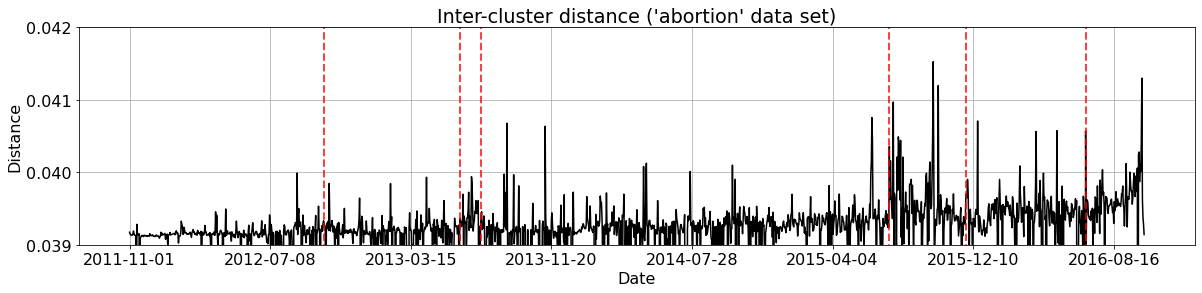

In [11]:
plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 16})
plt.plot(k_between[980:], color = 'k')
plt.plot((pickle_idx.index('2012-10-11') - 980) * np.ones(2), [0, 0.05], linewidth = 2, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2013-06-11') - 980) * np.ones(2), [0, 0.05], linewidth = 2, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2013-07-18') - 980) * np.ones(2), [0, 0.05], linewidth = 2, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2015-07-14') - 980) * np.ones(2), [0, 0.05], linewidth = 2, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2015-11-27') - 980) * np.ones(2), [0, 0.05], linewidth = 2, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2016-06-27') - 980) * np.ones(2), [0, 0.05], linewidth = 2, color = 'r', alpha = 0.75, linestyle = '--')
plt.ylim([0.039, 0.042])
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("Inter-cluster distance ('abortion' data set)")
plt.grid()

plt.savefig("../plots/ad_hoc/_ab_intercluster_distance.png", bbox_inches = 'tight')

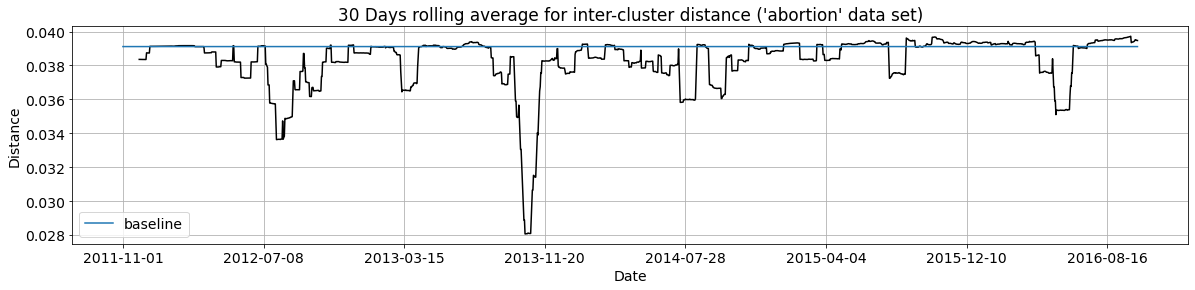

In [15]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between[980:]).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:900]).mean() * np.ones(len(k_between[980:])), label = 'baseline')
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('abortion' data set)")
plt.grid()

plt.savefig("../plots/abortion_daily/intercluster_rolling.png")

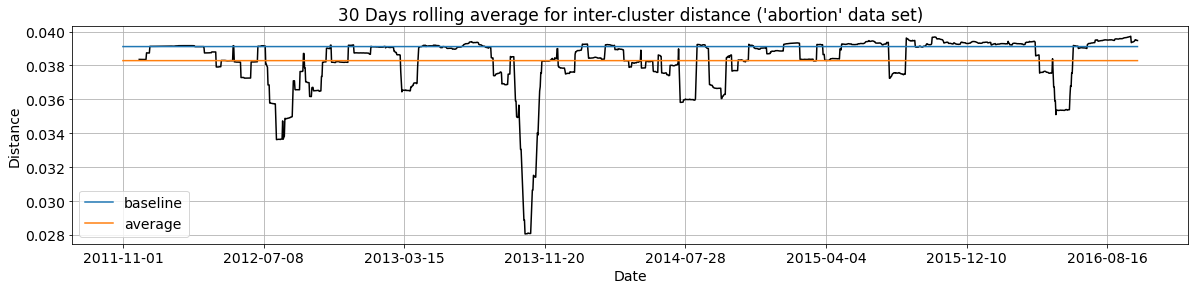

In [17]:
plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 14})
plt.plot(pd.Series(k_between[980:]).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:900]).mean() * np.ones(len(k_between[980:])), label = 'baseline')
plt.plot(np.array(k_between[980:]).mean() * np.ones(len(k_between[980:])), label = 'average')
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('abortion' data set)")
plt.grid()

plt.savefig("../plots/abortion_daily/intercluster_rolling_avg.png")

In [18]:
# plot the neighbourhood for each event
events = ['2012-10-11', '2013-06-11', '2013-07-18', '2015-07-14', '2015-11-27', '2016-06-27']
for ev in events:

    vals = k_between[pickle_idx.index(ev) - 15:pickle_idx.index(ev) + 16]
    b = k_between[pickle_idx.index(ev)]

    plt.figure(figsize = (10, 5))
    plt.bar(x = range(0, 31), height = 100 * (vals / b - 1), color = 'k')
    plt.plot(100 * (np.array(k_between[0:900]).mean() / b - 1) * np.ones(31), linestyle = '--', label = 'baseline')
    plt.plot(100 * (np.array(k_between[980:]).mean() / b - 1) * np.ones(31), linestyle = '--', label = 'average')
    plt.xlabel("Date")
    plt.ylabel("Difference [%]")
    plt.xticks(ticks = [0, 15, 30], labels = ['-15 days', 'event', '+15 days'])
    plt.title("Inter-cluster distance around {}".format(ev))
    plt.legend()
    plt.grid()

    plt.savefig("../plots/abortion_daily/intercluster_{}".format(ev))
    plt.close()

In [19]:
fidx  = []
fpidx = []
for i in range(0, len(k_between), 500): 
    fidx.append(i)
    fpidx.append(i)

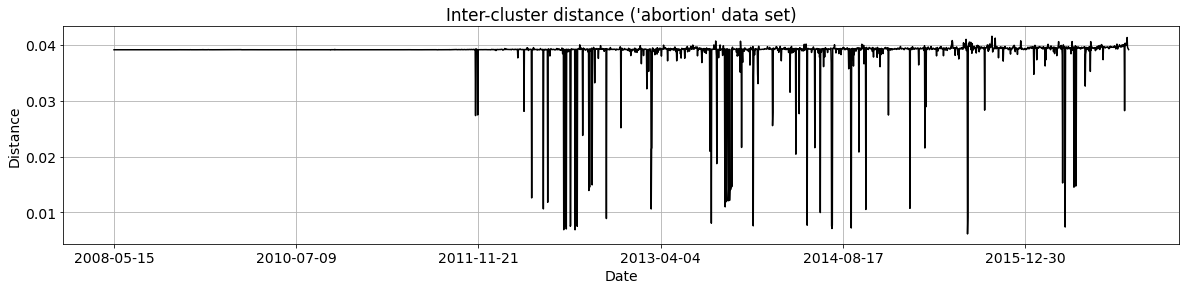

In [20]:
plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 14})
plt.plot(k_between, color = 'k')
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("Inter-cluster distance ('abortion' data set)")
plt.xticks(ticks = fidx, labels = np.array(pickle_idx)[fpidx])
plt.grid()

plt.savefig("../plots/abortion_daily/intercluster_distance_full.png")

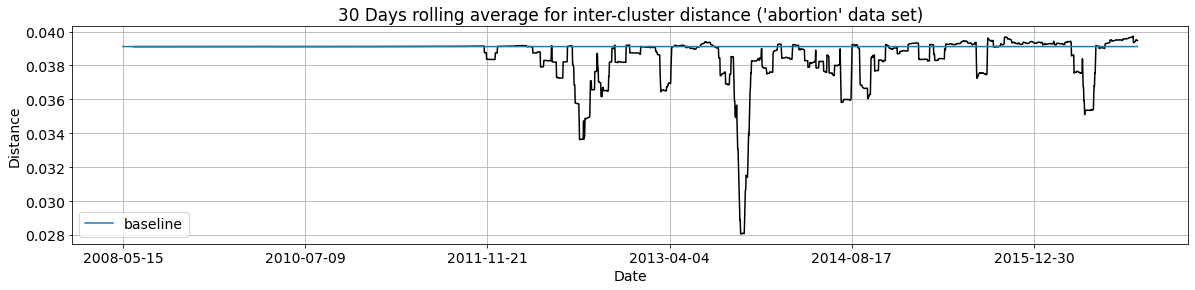

In [21]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:900]).mean() * np.ones(len(k_between)), label = 'baseline')
plt.xticks(ticks = fidx, labels = np.array(pickle_idx)[fpidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('abortion' data set)")
plt.grid()

plt.savefig("../plots/abortion_daily/intercluster_rolling_full.png")

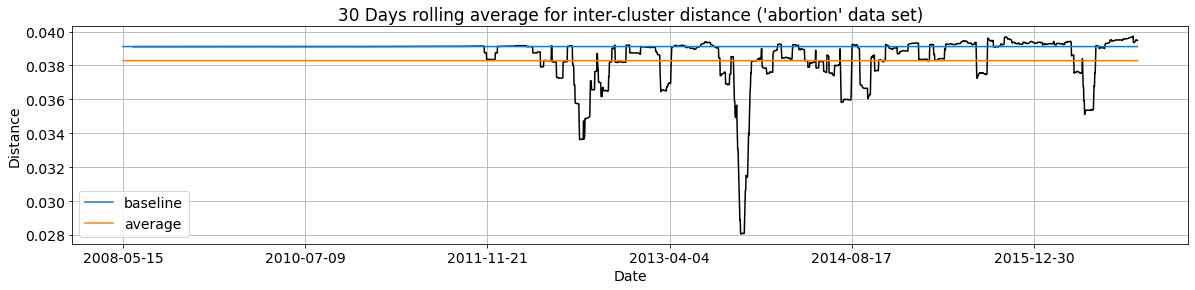

In [22]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:900]).mean() * np.ones(len(k_between)), label = 'baseline')
plt.plot(np.array(k_between[980:]).mean() * np.ones(len(k_between)), label = 'average')
plt.xticks(ticks = fidx, labels = np.array(pickle_idx)[fpidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('abortion' data set)")
plt.grid()

plt.savefig("../plots/abortion_daily/intercluster_rolling_avg_full.png")

In [378]:
#### Values smaller or equal to the baseline
l       = len(k_between[980:])
base    = len(np.array(k_between[980:])[k_between[980:] >= np.array(k_between[0:900]).mean()])
base001 = len(np.array(k_between[980:])[k_between[980:] >= 1.001 * np.array(k_between[0:900]).mean()])
base01  = len(np.array(k_between[980:])[k_between[980:] >= 1.01 * np.array(k_between[0:900]).mean()])
base02  = len(np.array(k_between[980:])[k_between[980:] >= 1.02 * np.array(k_between[0:900]).mean()])
base03  = len(np.array(k_between[980:])[k_between[980:] >= 1.03 * np.array(k_between[0:900]).mean()])
base04  = len(np.array(k_between[980:])[k_between[980:] >= 1.04 * np.array(k_between[0:900]).mean()])
base05  = len(np.array(k_between[980:])[k_between[980:] >= 1.05 * np.array(k_between[0:900]).mean()])
base06  = len(np.array(k_between[980:])[k_between[980:] >= 1.06 * np.array(k_between[0:900]).mean()])
base07  = len(np.array(k_between[980:])[k_between[980:] >= 1.07 * np.array(k_between[0:900]).mean()])

print("Entries {}".format(l))
print("Of which >= 1.001: {}".format(base001))
print("Of which >= 1.01: {}".format(base01))
print("Of which >= 1.02: {}".format(base02))
print("Of which >= 1.03: {}".format(base03))
print("Of which >= 1.04: {}".format(base04))
print("Of which >= 1.05: {}".format(base05))
print("Of which >= 1.06: {}".format(base06))
print("Of which >= 1.07: {}".format(base07))

Entries 1805
Of which >= 1.001: 1318
Of which >= 1.01: 264
Of which >= 1.02: 56
Of which >= 1.03: 18
Of which >= 1.04: 7
Of which >= 1.05: 3
Of which >= 1.06: 1
Of which >= 1.07: 0


## Pickle the distances

In [86]:
with open("../pickle/abortion_daily_between.pkl", "wb") as file:
    pkl.dump([k_between, pickle_idx], file)

## For the daily 'guncontrol' bidimensional laplacian eigenmaps

In [12]:
# get dates mapping
pickle_folder_path = "../pickle/guncontrol_daily_largest_aligned_norm2/"

pickle_files_aligned = [f for f in os.listdir(pickle_folder_path) if os.path.isfile(os.path.join(pickle_folder_path, f))]

pickle_idx = []
for pickle_ in pickle_files_aligned:
    pickle_idx.append((pickle_.split(".")[0].split("_")[1]))

ordered_pickle_files_ = []
for i, j in sorted(zip(pickle_idx, pickle_files_aligned)):
    ordered_pickle_files_.append(j)
    
# get the polarity scores
polarities = pd.read_csv("../keras/guncontrol_daily/ordered_predictions.csv")

cls0 = list(polarities[polarities['Class'] == 0].index)
cls1 = list(polarities[polarities['Class'] == 1].index)

In [13]:
# sort the pickle index
pickle_idx.sort()

In [92]:
# get the in-between cluster distance; the intra-cluster distance will only be computer
# for a reduced subset given that we cannot place it whole into memory and we need to
# iterate two pair points

k_between  = []
k = 0

for file in ordered_pickle_files_:
    
    if k % 100 == 0:
        print("Running for file: {}".format(k))
        
    # read the pickled file
    with open(os.path.join(pickle_folder_path, file), "rb") as pickle_file:
        _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)
        
    # get the distances
    xa = []
    xb = []
    for iter in range(0, 2):
        xa.append(xy_pairs[cls0, iter].mean())
        xb.append(xy_pairs[cls1, iter].mean())

    xa = np.array(xa).reshape(1, 2)
    xb = np.array(xb).reshape(1, 2)
    k_between.append(cdist(xa, xb)[0][0])
    
    k += 1

Running for file: 0
Running for file: 100
Running for file: 200
Running for file: 300
Running for file: 400
Running for file: 500
Running for file: 600
Running for file: 700
Running for file: 800
Running for file: 900
Running for file: 1000
Running for file: 1100
Running for file: 1200
Running for file: 1300
Running for file: 1400
Running for file: 1500
Running for file: 1600
Running for file: 1700
Running for file: 1800
Running for file: 1900
Running for file: 2000
Running for file: 2100
Running for file: 2200
Running for file: 2300
Running for file: 2400


## Plot some traces

In [ ]:
"""
Benchmark events:
December 14, 2012: Sandy Hook Elementary School shooting
*January 15, 2013: NY gun control legislation is signed into law, the leg. is in response to the previous mass shooting
April 17, 2013: Assault Weapons Ban of 2013 is defeated in Senate, 60 to 40; the bill was a
                response to the Sandy Hook Elementary School shooting
May 2-5, 2013: 2013 Houston, NRA annual convention (+ anti gun protests)
*October 1, 2015: Mass shooting in Oregon; in the follow-up, then presidential candidate Hillary Clinton
                  expresses her support for more gun regulations; 14 Oct - democratic debate; her and Bernie Sanders are divided in regards
                  to gun laws.
January 5, 2016: Whitehouse doc. 4th; lots of news articles in the following days;
                 Obama's Administration presents executive action on gun restrictions
June 15, 2016: Gun control filibuster is commenced by Democratic Senator in response to the then
               newly occured Orlando, Florida mass shooting.
"""

In [14]:
idx  = []
pidx = []
for i in range(0, 1805, 250): 
    idx.append(i)
    pidx.append(i + 606)

In [15]:
with open("../pickle/guncontrol_daily_between.pkl", "rb") as file:
    k_between, pickle_idx = pkl.load(file)

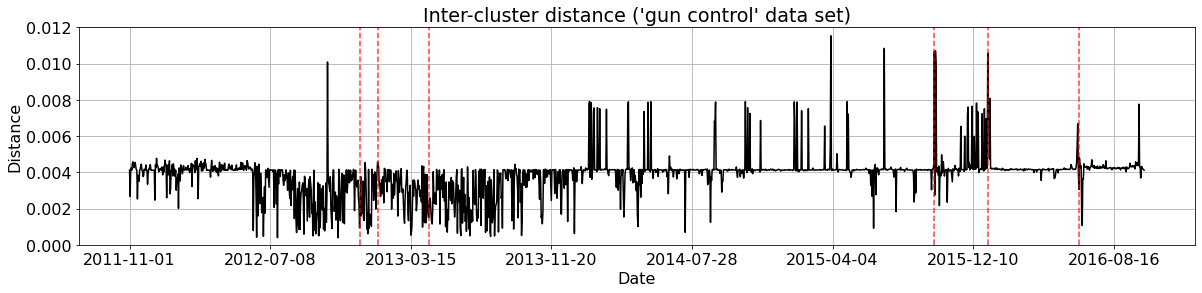

In [19]:
plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 16})
plt.plot(k_between[606:], color = 'k')
plt.plot((pickle_idx.index('2012-12-14') - 606) * np.ones(2), [0, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2013-01-15') - 606) * np.ones(2), [0, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2013-04-17') - 606) * np.ones(2), [0, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2015-10-01') - 606) * np.ones(2), [0, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2016-01-05') - 606) * np.ones(2), [0, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2016-06-15') - 606) * np.ones(2), [0, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.ylim([0, 0.012])
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("Inter-cluster distance ('gun control' data set)")
plt.grid()

plt.savefig("../plots/ad_hoc/_gc_intercluster_distance.png", bbox_inches = 'tight')

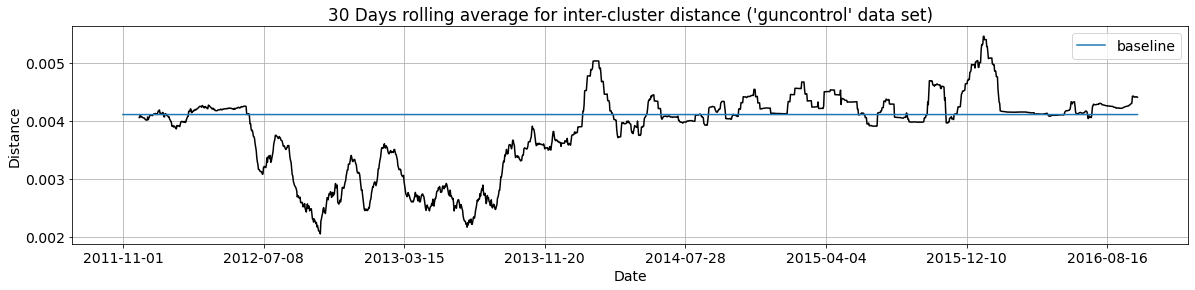

In [26]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between[606:]).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:300]).mean() * np.ones(len(k_between[606:])), label = 'baseline')
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('guncontrol' data set)")
plt.grid()

plt.savefig("../plots/guncontrol_daily/intercluster_rolling.png")

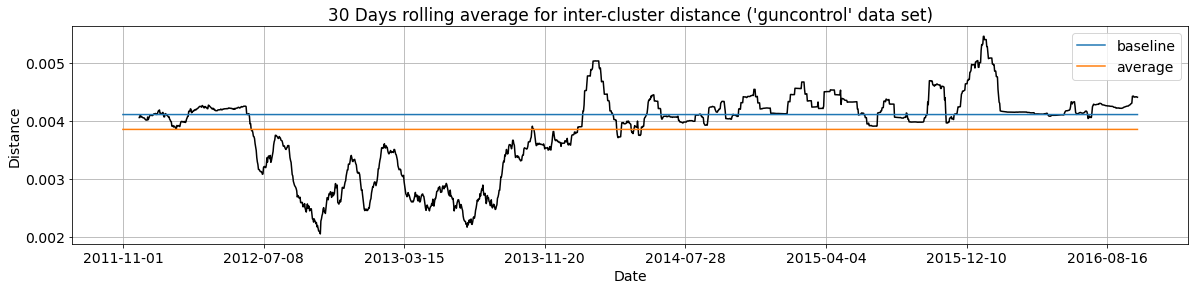

In [27]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between[606:]).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:300]).mean() * np.ones(len(k_between[606:])), label = 'baseline')
plt.plot(np.array(k_between[606:]).mean() * np.ones(len(k_between[606:])), label = 'average')
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('guncontrol' data set)")
plt.grid()

plt.savefig("../plots/guncontrol_daily/intercluster_rolling_avg.png")

In [28]:
# plot the neighbourhood for each event
events = ['2012-12-14', '2013-01-15', '2013-05-02', '2013-04-17', '2015-10-01', '2016-01-05', '2016-06-15']
for ev in events:

    vals = k_between[pickle_idx.index(ev) - 15:pickle_idx.index(ev) + 16]
    b = k_between[pickle_idx.index(ev)]

    plt.figure(figsize = (10, 5))
    plt.bar(x = range(0, 31), height = 100 * (vals / b - 1), color = 'k')
    plt.plot(100 * (np.array(k_between[0:300]).mean() / b - 1) * np.ones(31), linestyle = '--', label = 'baseline')
    plt.plot(100 * (np.array(k_between[606:]).mean() / b - 1) * np.ones(31), linestyle = '--', label = 'average')
    plt.xlabel("Date")
    plt.ylabel("Difference [%]")
    plt.xticks(ticks = [0, 15, 30], labels = ['-15 days', 'event', '+15 days'])
    plt.title("Inter-cluster distance around {}".format(ev))
    plt.legend()
    plt.grid()

    plt.savefig("../plots/guncontrol_daily/intercluster_{}".format(ev))
    plt.close()

In [29]:
fidx  = []
fpidx = []
for i in range(0, len(k_between), 500): 
    fidx.append(i)
    fpidx.append(i)

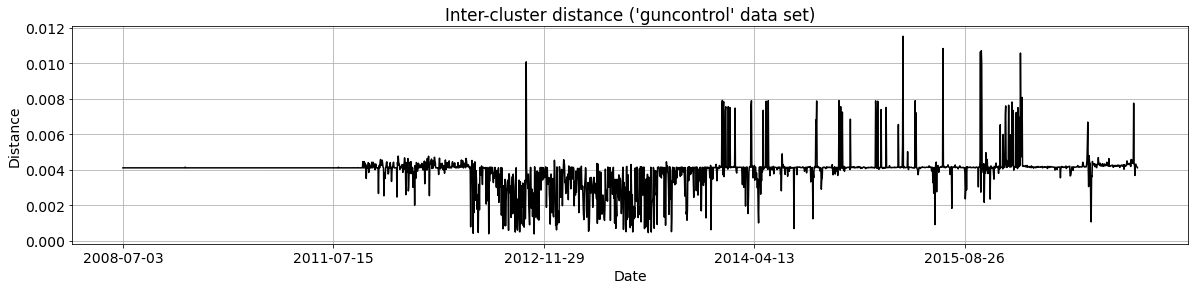

In [30]:
plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 14})
plt.plot(k_between, color = 'k')
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("Inter-cluster distance ('guncontrol' data set)")
plt.xticks(ticks = fidx, labels = np.array(pickle_idx)[fpidx])
plt.grid()

plt.savefig("../plots/guncontrol_daily/intercluster_distance_full.png")

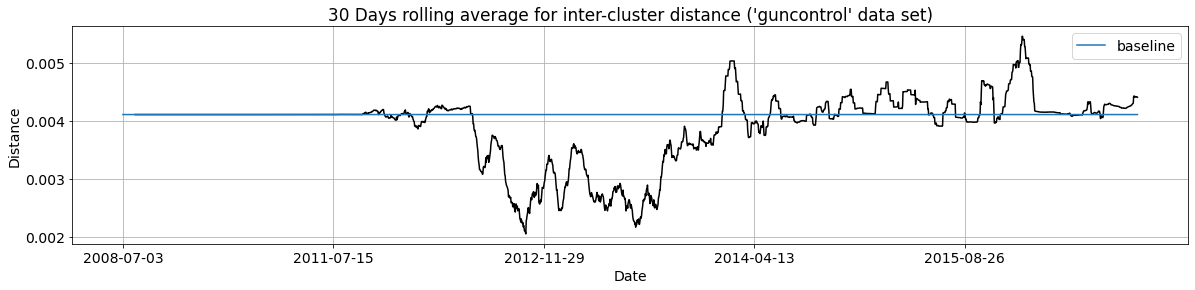

In [31]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:300]).mean() * np.ones(len(k_between)), label = 'baseline')
plt.xticks(ticks = fidx, labels = np.array(pickle_idx)[fpidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('guncontrol' data set)")
plt.grid()

plt.savefig("../plots/guncontrol_daily/intercluster_rolling_full.png")

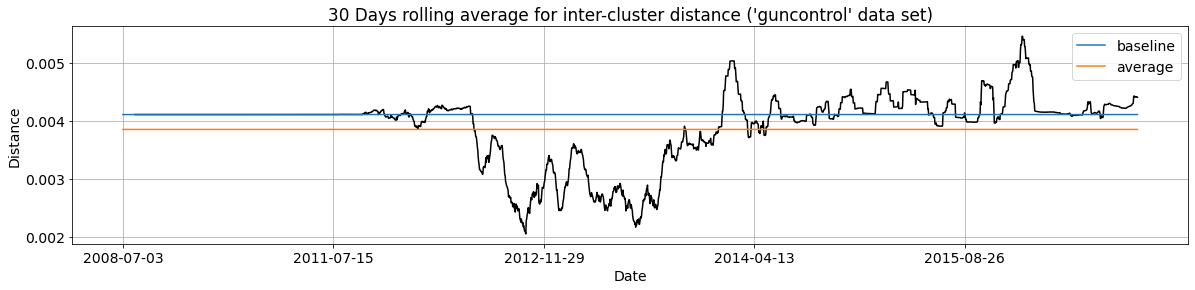

In [32]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:300]).mean() * np.ones(len(k_between)), label = 'baseline')
plt.plot(np.array(k_between[606:]).mean() * np.ones(len(k_between)), label = 'average')
plt.xticks(ticks = fidx, labels = np.array(pickle_idx)[fpidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('guncontrol' data set)")
plt.grid()

plt.savefig("../plots/guncontrol_daily/intercluster_rolling_avg_full.png")

In [370]:
#### Values smaller or equal to the baseline
l       = len(k_between[606:])
base    = len(np.array(k_between[606:])[k_between[606:] >= np.array(k_between[0:300]).mean()])
base001 = len(np.array(k_between[606:])[k_between[606:] >= 1.001 * np.array(k_between[0:300]).mean()])
base01  = len(np.array(k_between[606:])[k_between[606:] >= 1.01 * np.array(k_between[0:300]).mean()])
base02  = len(np.array(k_between[606:])[k_between[606:] >= 1.02 * np.array(k_between[0:300]).mean()])
base03  = len(np.array(k_between[606:])[k_between[606:] >= 1.03 * np.array(k_between[0:300]).mean()])
base04  = len(np.array(k_between[606:])[k_between[606:] >= 1.04 * np.array(k_between[0:300]).mean()])
base05  = len(np.array(k_between[606:])[k_between[606:] >= 1.05 * np.array(k_between[0:300]).mean()])
base06  = len(np.array(k_between[606:])[k_between[606:] >= 1.06 * np.array(k_between[0:300]).mean()])
base07  = len(np.array(k_between[606:])[k_between[606:] >= 1.07 * np.array(k_between[0:300]).mean()])
base08  = len(np.array(k_between[606:])[k_between[606:] >= 1.08 * np.array(k_between[0:300]).mean()])
base09  = len(np.array(k_between[606:])[k_between[606:] >= 1.09 * np.array(k_between[0:300]).mean()])
base10  = len(np.array(k_between[606:])[k_between[606:] >= 1.10 * np.array(k_between[0:300]).mean()])

print("Entries {}".format(l))
print("Of which >= 1.001: {}".format(base001))
print("Of which >= 1.01: {}".format(base01))
print("Of which >= 1.02: {}".format(base02))
print("Of which >= 1.03: {}".format(base03))
print("Of which >= 1.04: {}".format(base04))
print("Of which >= 1.05: {}".format(base05))
print("Of which >= 1.06: {}".format(base06))
print("Of which >= 1.07: {}".format(base07))
print("Of which >= 1.08: {}".format(base08))
print("Of which >= 1.09: {}".format(base09))
print("Of which >= 1.10: {}".format(base10))

Entries 1805
Of which >= 1.001: 1095
Of which >= 1.01: 546
Of which >= 1.02: 326
Of which >= 1.03: 254
Of which >= 1.04: 211
Of which >= 1.05: 173
Of which >= 1.06: 147
Of which >= 1.07: 123
Of which >= 1.08: 107
Of which >= 1.09: 94
Of which >= 1.10: 86


## Pickle the distance

In [122]:
with open("../pickle/guncontrol_daily_between.pkl", "wb") as file:
    pkl.dump([k_between, pickle_idx], file)

## For the daily 'healthcare' bidimensional laplacian eigenmaps

In [20]:
# get dates mapping
pickle_folder_path = "../pickle/obamacare_daily_largest_aligned_norm2/"

pickle_files_aligned = [f for f in os.listdir(pickle_folder_path) if os.path.isfile(os.path.join(pickle_folder_path, f))]

pickle_idx = []
for pickle_ in pickle_files_aligned:
    pickle_idx.append((pickle_.split(".")[0].split("_")[1]))

ordered_pickle_files_ = []
for i, j in sorted(zip(pickle_idx, pickle_files_aligned)):
    ordered_pickle_files_.append(j)
    
# get the polarity scores
polarities = pd.read_csv("../keras/obamacare_daily/ordered_predictions.csv")

cls0 = list(polarities[polarities['Class'] == 0].index)
cls1 = list(polarities[polarities['Class'] == 1].index)

In [21]:
# sort the pickle index
pickle_idx.sort()

In [125]:
# get the in-between cluster distance; the intra-cluster distance will only be computer
# for a reduced subset given that we cannot place it whole into memory and we need to
# iterate two pair points

k_between  = []
k = 0

for file in ordered_pickle_files_:
    
    if k % 100 == 0:
        print("Running for file: {}".format(k))
        
    # read the pickled file
    with open(os.path.join(pickle_folder_path, file), "rb") as pickle_file:
        _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)
        
    # get the distances
    xa = []
    xb = []
    for iter in range(0, 2):
        xa.append(xy_pairs[cls0, iter].mean())
        xb.append(xy_pairs[cls1, iter].mean())

    xa = np.array(xa).reshape(1, 2)
    xb = np.array(xb).reshape(1, 2)
    k_between.append(cdist(xa, xb)[0][0])
    
    k += 1

Running for file: 0
Running for file: 100
Running for file: 200
Running for file: 300
Running for file: 400
Running for file: 500
Running for file: 600
Running for file: 700
Running for file: 800
Running for file: 900
Running for file: 1000
Running for file: 1100
Running for file: 1200
Running for file: 1300
Running for file: 1400
Running for file: 1500
Running for file: 1600
Running for file: 1700
Running for file: 1800
Running for file: 1900
Running for file: 2000
Running for file: 2100
Running for file: 2200
Running for file: 2300
Running for file: 2400
Running for file: 2500


## Plot the trace

In [ ]:
"""
June 28, 2012: Supreme Court upholds Heart Care Law
October 3 (2-4), 2012: Afordable Health Care Act is discussed during the presidential debate
September 20, 2013: House Republicans pass spending plan that defunds AHCA
*December 10, 12, 2013: The confirmation of Obama's D.C. Circuit judges
*July 30, 2014: U.S. house of representatives v. burwell: the house voted in favor (225 to 201) of a resolution to file a lawsuit
June 25, 2015: Supreme Court rulling preserves the AHCA subsidies
"""

In [22]:
idx  = []
pidx = []
for i in range(0, 1805, 250): 
    idx.append(i)
    pidx.append(i + 774)

In [23]:
with open("../pickle/obamacare_daily_between.pkl", "rb") as file:
    k_between, pickle_idx = pkl.load(file)

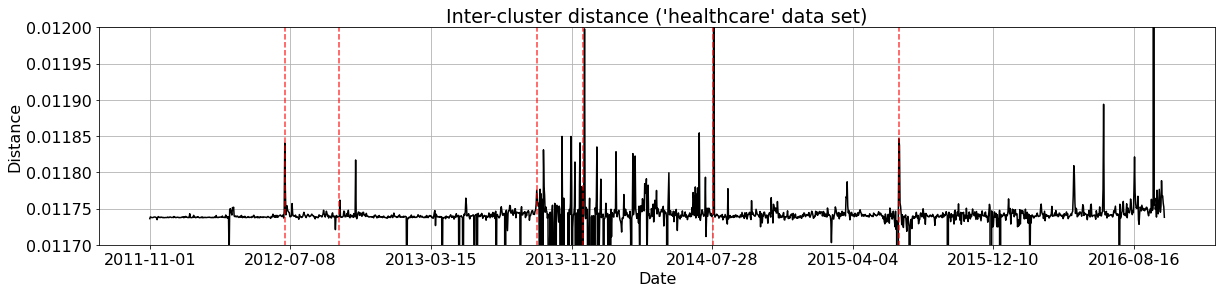

In [25]:
plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 16})
plt.plot(k_between[774:], color = 'k')
plt.plot((pickle_idx.index('2012-06-28') - 774) * np.ones(2), [0.01, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2012-10-03') - 774) * np.ones(2), [0.01, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2013-09-20') - 774) * np.ones(2), [0.01, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2013-12-10') - 774) * np.ones(2), [0.01, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2014-07-30') - 774) * np.ones(2), [0.01, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.plot((pickle_idx.index('2015-06-25') - 774) * np.ones(2), [0.01, 0.012], linewidth = 1.5, color = 'r', alpha = 0.75, linestyle = '--')
plt.ylim([0.0117, 0.012])
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("Inter-cluster distance ('healthcare' data set)")
plt.grid()

plt.savefig("../plots/ad_hoc/_hc_intercluster_distance.png", bbox_inches = 'tight')

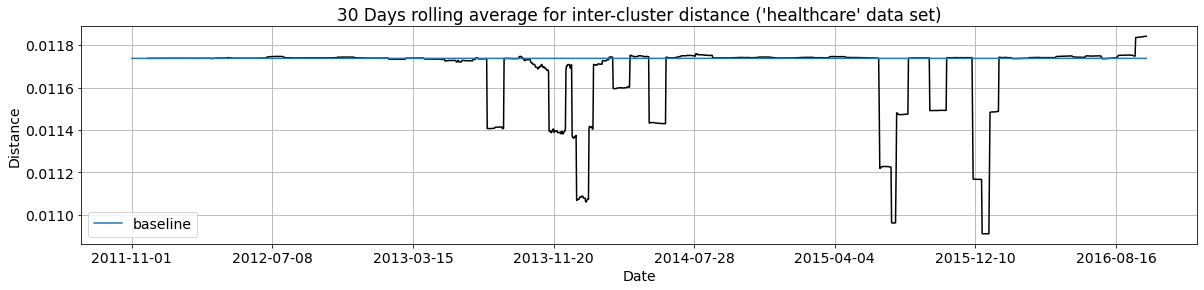

In [36]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between[774:]).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:500]).mean() * np.ones(len(k_between[774:])), label = 'baseline')
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('healthcare' data set)")
plt.grid()

plt.savefig("../plots/obamacare_daily/intercluster_rolling.png")

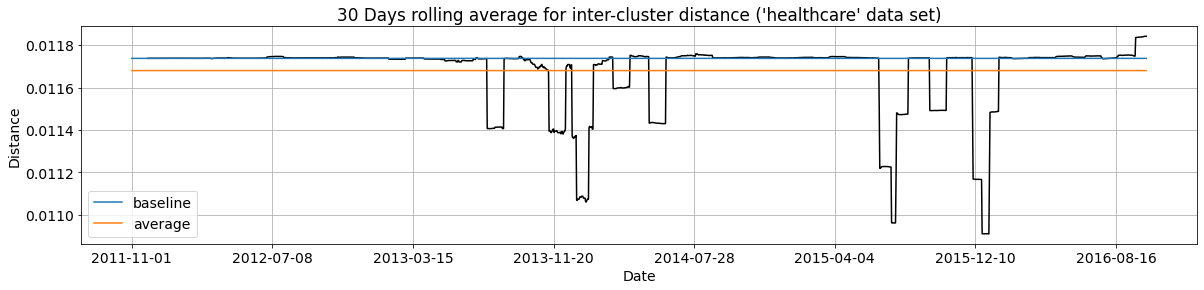

In [37]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between[774:]).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:500]).mean() * np.ones(len(k_between[774:])), label = 'baseline')
plt.plot(np.array(k_between[774:]).mean() * np.ones(len(k_between[774:])), label = 'average')
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('healthcare' data set)")
plt.grid()

plt.savefig("../plots/obamacare_daily/intercluster_rolling_avg.png")

In [38]:
# plot the neighbourhood for each event
events = ['2012-06-28', '2012-10-03', '2013-09-20', '2013-12-10', '2014-07-30', '2015-06-25']
for ev in events:

    vals = k_between[pickle_idx.index(ev) - 15:pickle_idx.index(ev) + 16]
    b = k_between[pickle_idx.index(ev)]

    plt.figure(figsize = (10, 5))
    plt.bar(x = range(0, 31), height = 100 * (vals / b - 1), color = 'k')
    plt.plot(100 * (np.array(k_between[0:500]).mean() / b - 1) * np.ones(31), linestyle = '--', label = 'baseline')
    plt.plot(100 * (np.array(k_between[774:]).mean() / b - 1) * np.ones(31), linestyle = '--', label = 'average')
    plt.xlabel("Date")
    plt.ylabel("Difference [%]")
    plt.xticks(ticks = [0, 15, 30], labels = ['-15 days', 'event', '+15 days'])
    plt.title("Inter-cluster distance around {}".format(ev))
    plt.legend()
    plt.grid()

    plt.savefig("../plots/obamacare_daily/intercluster_{}".format(ev))
    plt.close()

In [39]:
fidx  = []
fpidx = []
for i in range(0, len(k_between), 500): 
    fidx.append(i)
    fpidx.append(i)

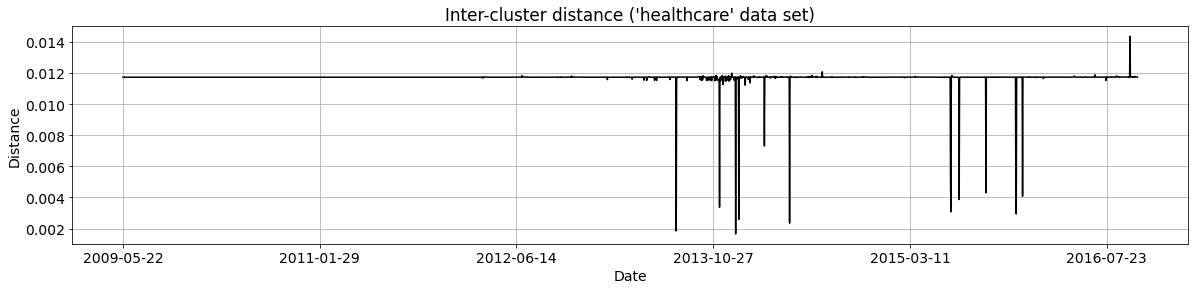

In [40]:
plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 14})
plt.plot(k_between, color = 'k')
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("Inter-cluster distance ('healthcare' data set)")
plt.xticks(ticks = fidx, labels = np.array(pickle_idx)[fpidx])
plt.grid()

plt.savefig("../plots/obamacare_daily/intercluster_distance_full.png")

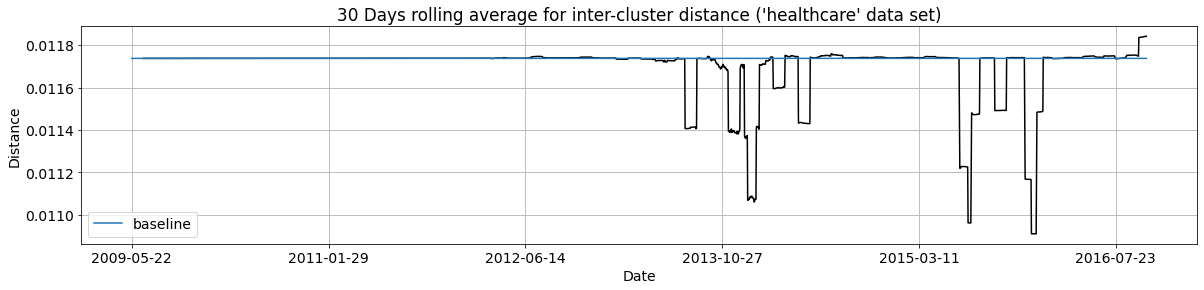

In [41]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:500]).mean() * np.ones(len(k_between)), label = 'baseline')
plt.xticks(ticks = fidx, labels = np.array(pickle_idx)[fpidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('healthcare' data set)")
plt.grid()

plt.savefig("../plots/obamacare_daily/intercluster_rolling_full.png")

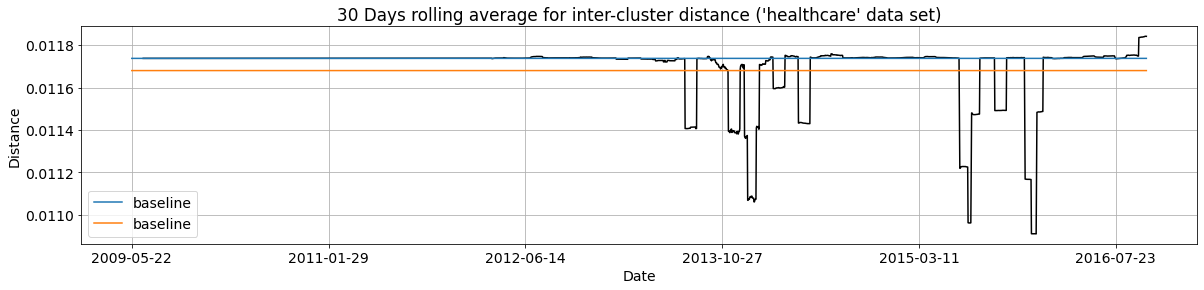

In [42]:
plt.figure(figsize = (20, 4))
plt.plot(pd.Series(k_between).rolling(window = 30).mean()[29:], color = 'k')
plt.plot(np.array(k_between[0:500]).mean() * np.ones(len(k_between)), label = 'baseline')
plt.plot(np.array(k_between[774:]).mean() * np.ones(len(k_between)), label = 'baseline')
plt.xticks(ticks = fidx, labels = np.array(pickle_idx)[fpidx])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("30 Days rolling average for inter-cluster distance ('healthcare' data set)")
plt.grid()

plt.savefig("../plots/obamacare_daily/intercluster_rolling_avg_full.png")

In [397]:
#### Values smaller or equal to the baseline
l       = len(k_between[774:])
base    = len(np.array(k_between[774:])[k_between[774:] >= np.array(k_between[0:500]).mean()])
base001 = len(np.array(k_between[774:])[k_between[774:] >= 1.001 * np.array(k_between[0:500]).mean()])
base002 = len(np.array(k_between[774:])[k_between[774:] >= 1.002 * np.array(k_between[0:500]).mean()])
base005 = len(np.array(k_between[774:])[k_between[774:] >= 1.005 * np.array(k_between[0:500]).mean()])
base01  = len(np.array(k_between[774:])[k_between[774:] >= 1.01 * np.array(k_between[0:500]).mean()])
base02  = len(np.array(k_between[774:])[k_between[774:] >= 1.02 * np.array(k_between[0:500]).mean()])

print("Entries {}".format(l))
print("Of which >= 1.001: {}".format(base001))
print("Of which >= 1.002: {}".format(base002))
print("Of which >= 1.005: {}".format(base005))
print("Of which >= 1.01: {}".format(base01))
print("Of which >= 1.02: {}".format(base02))

Entries 1805
Of which >= 1.001: 186
Of which >= 1.002: 76
Of which >= 1.005: 22
Of which >= 1.01: 4
Of which >= 1.02: 3


## Pickle the distance

In [186]:
with open("../pickle/obamacare_daily_between.pkl", "wb") as file:
    pkl.dump([k_between, pickle_idx], file)